# Praca domowa 7
Klaudia Gruszkowska

Zadanie polega na detekcji wartości odstających w danych. 

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
val = pd.read_csv("val.csv")

In [3]:
train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
1,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
2,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
3,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
4,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480


In [4]:
train.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,12.604211,2.436000,2.315895,20.662105,96.726316,2.018526,1.539579,0.400000,1.429263,4.941789,0.912589,2.307263,572.242105
std,0.682538,1.191029,0.298223,3.227778,13.737232,0.538838,0.822284,0.130245,0.550238,2.749656,0.260982,0.695243,148.401534
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.470000,0.130000,0.410000,1.280000,0.480000,1.270000,290.000000
25%,12.165000,1.430000,2.195000,18.500000,87.500000,1.620000,0.815000,0.290000,1.040000,2.875000,0.675000,1.675000,465.500000
50%,12.520000,2.130000,2.320000,20.000000,94.000000,1.950000,1.460000,0.400000,1.350000,3.850000,0.906000,2.260000,560.000000
75%,13.095000,3.280000,2.500000,22.500000,103.000000,2.310000,2.075000,0.500000,1.680000,6.550000,1.110000,2.915000,676.500000
max,14.340000,5.650000,3.230000,30.000000,151.000000,3.500000,5.080000,0.630000,3.580000,13.000000,1.710000,3.690000,985.000000


Możemy zauważyć, że nie ma braków danych. 

### Trenowanie

In [6]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc

In [8]:
y = np.zeros(95,int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [9]:
random_state = 2
tSNE = TSNE(random_state=random_state, verbose=1)
train_proj = tSNE.fit_transform(train)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 95 samples in 0.000s...
[t-SNE] Computed neighbors for 95 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 95 / 95
[t-SNE] Mean sigma: 13.323457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.265884
[t-SNE] KL divergence after 900 iterations: 0.087405


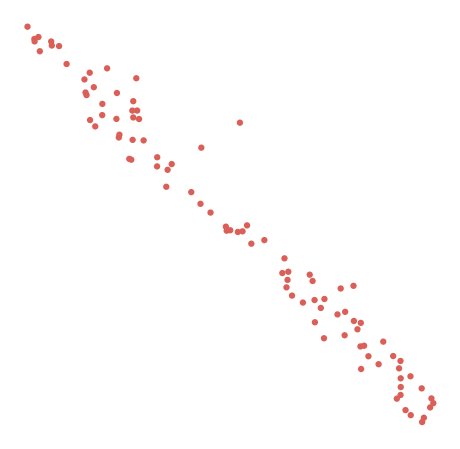

In [10]:
scatter(train_proj, y)
plt.show()

Wybieram liczbę komponentów i typ kowariancji korzystając z zaproponowanej przez twórców pakietu sklear metody i wykresu bic dla modelu Gausian Mixture.

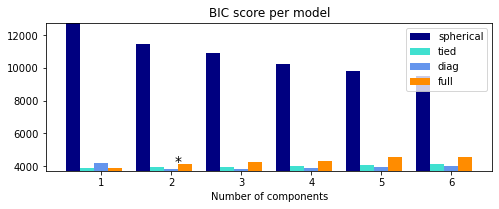

In [11]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(train)
        bic.append(gmm.bic(train))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []


plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)


Z wykresu można odczytać, że najlepszy jest model z ilością komponentów równą 2 i typem kowariancji diag.

In [12]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 2, covariance_type = 'diag', random_state=0 )
gm.fit(train)
gm.score_samples(train)

array([-17.28386418, -15.77838756, -15.80011099, -18.20926101,
       -15.14052141, -16.27925238, -24.85266747, -27.98406842,
       -15.966761  , -12.51657933, -19.35969301, -19.04924274,
       -23.3867766 , -18.58719057, -17.34363893, -16.58779196,
       -17.38146806, -16.3353046 , -16.28745503, -14.75363942,
       -23.08445191, -23.05957232, -18.31496394, -18.98445632,
       -18.2974435 , -18.72326871, -16.89698446, -21.37897237,
       -15.47543726, -20.06304607, -28.22360091, -14.65850349,
       -14.91153287, -18.43907902, -20.74093344, -15.27990983,
       -17.83132971, -17.64293491, -22.71534418, -21.12656501,
       -13.20800042, -17.39973134, -15.96876838, -16.09863117,
       -16.16021505, -17.88211892, -33.03050697, -20.68143313,
       -41.49236441, -20.28779427, -23.87215167, -18.81558373,
       -15.23012463, -24.49332534, -16.10367437, -16.80135018,
       -16.7933464 , -20.64234364, -21.74502201, -20.26790499,
       -16.79798964, -21.0516536 , -15.68985965, -18.47

Score samples wskazuje na ważone prawdopodobieństwa logarytmiczne dla każdej próbki.

In [13]:
min(gm.score_samples(train))

-41.49236441118691

Sprawdzę jak obrazowo możemy zobaczyć rozkład próbki treningowej z podziałem na klastry wyliczonym przez nmodel.

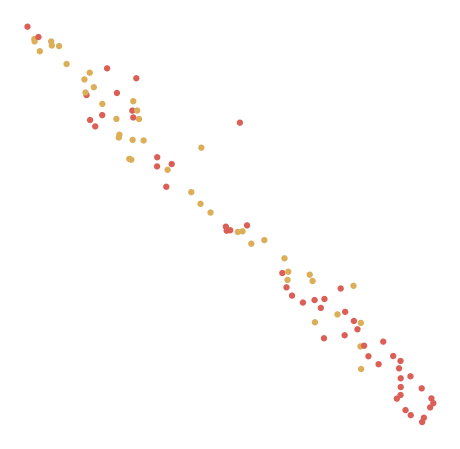

In [14]:
scatter(train_proj,gm.predict(train))
plt.show()

Dodatkowo możemy zilustrować jak wygląda prawdopodobieństwo dopasowania obserwacji do poszczególnych klastrów. NA pierwszym wykresie pokazane jest prawdopodbieństwo dopasowania do pierwszego klastra, a na drugim do drugiego.

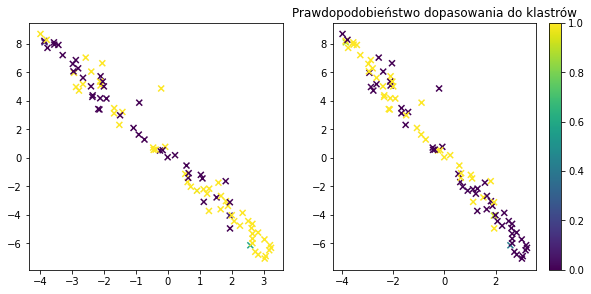

In [15]:
plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.scatter(train_proj[:,0],train_proj[:,1],c=gm.predict_proba(train)[:,i],cmap='viridis',marker='x')
plt.colorbar();
plt.title('Prawdopodobieństwo dopasowania do klastrów')
plt.show()

Z wykresów można wyczytać, że obserwacje pewne dopasowania do klastra są zaznaczone na żółto, a skrajnie nie pasujące na fioletowo. Jest jednak obserwacja (na pierwszym wykresie w punkcie (2.5, -6)), która nie jest tak bardzo pewna. Wiemy jednak, że w zbiorze treningowym nie ma wartości odstających.

Następnie przejdziemy do predykcji obserwacji ze zbioru walidacyjnego, który składa się już też z obserwacji odstających.

In [16]:
random_state = 2
tSNE = TSNE(random_state=random_state, verbose=1)
val_proj = tSNE.fit_transform(val)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 17 samples in 0.000s...
[t-SNE] Computed neighbors for 17 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 17 / 17
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.865135
[t-SNE] KL divergence after 1000 iterations: 0.371654


In [17]:
y_val = gm.predict(val)

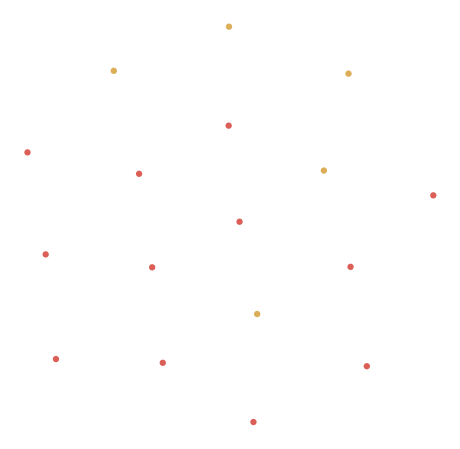

In [18]:
scatter(val_proj, y_val)
plt.show()

In [19]:
gm.score_samples(val)

array([-24.36690887, -12.55353728, -13.85071709, -22.36327348,
       -22.61928824, -13.95117666, -18.83698115, -38.69725052,
       -25.49426696, -15.63739858, -30.15376166, -18.75991923,
       -27.98457997, -23.40244583, -20.26662346, -20.54408719,
       -47.99492275])

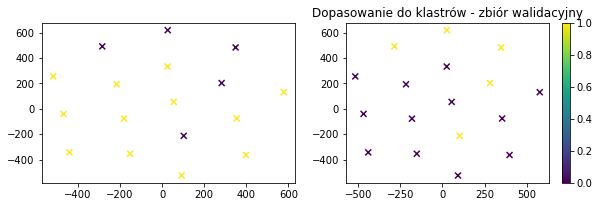

In [20]:
plt.figure(figsize=(10,10))
for i in range(2):
    plt.subplot(3,2,i+1)
    plt.scatter(val_proj[:,0],val_proj[:,1],c=gm.predict_proba(val)[:,i],cmap='viridis',marker='x')
plt.colorbar()
plt.title("Dopasowanie do klastrów - zbiór walidacyjny")
plt.show()

### Wybór treshholdu

Wybór tresholdu czyli punktu odcięcia, który odróżnia obserwacje odstające od zbioru. Wybieram treshold = 35, ponieważ większość obserwacji z zbioru treningowego znajduję się poniżej tej wartości.

### Testowanie

In [21]:
test_y = test['class']
test_x = test.drop(columns=['class'])
scores = gm.score_samples(test_x)

Zobaczmy jak prezentują się wybrane przez model wartości odstające.

In [22]:
outliers = test[gm.score_samples(test_x)<-35]
outliers

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
13,1,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970
14,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
15,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
16,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.90,1.09,2.88,1515


In [23]:
test['pred']=0

### Ocena

In [24]:
from sklearn.metrics import confusion_matrix
xx = gm.score_samples(test_x)
for i in range(17):
    if xx[i]<-35:
        test['pred'].iloc[i]=1
    else:
        test['pred'].iloc[i]=0
y_true = test['class']
y_pred = test['pred']
confusion_matrix(y_true,y_pred)


array([[12,  0],
       [ 1,  4]], dtype=int64)

Z macierzy pomyłek widać, że przy treshold równym -35 tylko jedna obserwacje została źle zakwalifikowana. Przy takiej wartości również większość z wartości ze zbioru treningowego, byłaby dobrze zakwalifikowana.

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("F1 score: ",f1_score(test['class'], test['pred']))
print("Precision: ",precision_score(test['class'], test['pred']))
print("Recall: ",recall_score(test['class'], test['pred']))

F1 score:  0.888888888888889
Precision:  1.0
Recall:  0.8


In [26]:
xx = gm.score_samples(test_x)
for i in range(17):
    if xx[i]<-41.5:
        test['pred'].iloc[i]=1
    else:
        test['pred'].iloc[i]=0
y_true = test['class']
y_pred = test['pred']
confusion_matrix(y_true,y_pred)


array([[12,  0],
       [ 3,  2]], dtype=int64)

In [27]:
print("F1 score: ",f1_score(test['class'], test['pred']))
print("Precision: ",precision_score(test['class'], test['pred']))
print("Recall: ",recall_score(test['class'], test['pred']))

F1 score:  0.5714285714285715
Precision:  1.0
Recall:  0.4


Dla porównania, wybór tresholdu równego minimalnej wartości z zbioru treningowego, nie daje tak dobrych wyników.

Z tego porównania możemy zauważyć, że wybór dobrego punktu odcięcia jest kluczowy dla jakości detekcji wartości odstających. Miara precision w obu przypadkach jest równa 1 ponieważ jest liczona jako tp / (tp + fp) a tutaj w obu przypadkach fp jest równy 0( można zauważyć to w macierzy pomyłek).